In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('clinical_train.csv')

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.metrics import f1_score

In [5]:
from sklearn.metrics import roc_curve, auc 

In [6]:
import matplotlib.pyplot as plt

In [18]:
x_train = train.drop(['PATIENT_ID', 'Y_label'], axis = 1)
y_train = train['Y_label']

In [19]:
rfc1=RandomForestClassifier(class_weight= {0:1 , 1:2} , random_state=0, max_features='auto', n_estimators= 200, max_depth=3, criterion='entropy')

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)
# y_train.to_numpy()
# print(x_train.shape,y_train.shape)

In [10]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=100, n_features_to_keep=6)
x_train = fs.fit_transform(x_train, y_train)
# X_train = fs.fit_transform(X_train)
# X_test_subset = fs.transform(X_test)
print(x_train.shape, y_train.shape)

(1597, 6) (1597,)


In [21]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
test = pd.read_csv('clinical_test.csv')

In [23]:
x_test = test.drop(['PATIENT_ID', 'Y_label'], axis = 1)
y_test = test['Y_label']
x_test = np.array(x_test)
# x_test = fs.transform(x_test)

In [24]:
pred=rfc1.predict(x_test)

In [25]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.765


In [26]:
y_train[y_train == 1].shape

(418,)

In [27]:
y_test[y_test == 1].shape

(97,)

In [28]:
len(y_train)

1597

In [29]:
len(y_test)

400

In [30]:
print("F1 for Random Forest on CV data: ",f1_score(y_test,pred))

F1 for Random Forest on CV data:  0.5913043478260869


In [31]:
pred_score = rfc1.predict_proba(x_test)

In [32]:
pred_score = pred_score[:,1]

In [33]:
def plot_AUC_ROC(y_test, y_score):
    fpr,tpr,threshold = roc_curve(y_test, y_score) 
    roc_auc = auc(fpr,tpr) 

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

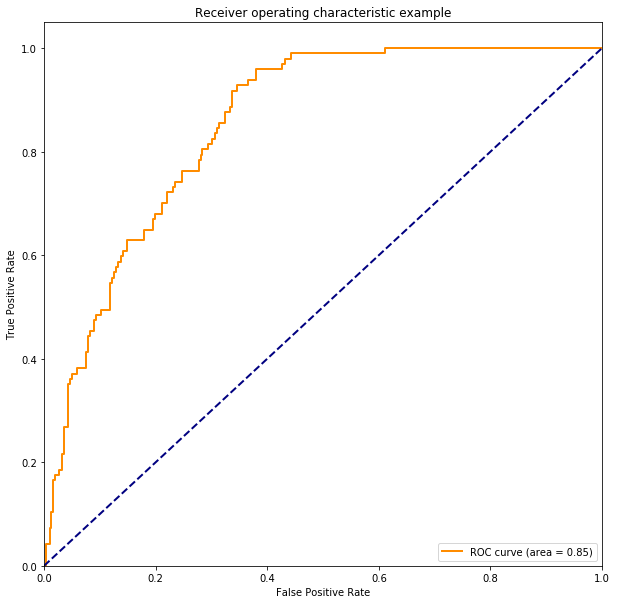

In [34]:
plot_AUC_ROC(y_test, pred_score)

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("F1 for Random Forest on CV data: ",precision_score(y_test,pred))
print("F1 for Random Forest on CV data: ",recall_score(y_test,pred))

F1 for Random Forest on CV data:  0.5112781954887218
F1 for Random Forest on CV data:  0.7010309278350515
